In [1]:
#!pip install qiskit

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer, BasicAer, IBMQ, transpile, assemble
from qiskit.visualization import array_to_latex, plot_histogram
from qiskit.circuit.random import random_circuit
from qiskit.quantum_info import Statevector, partial_trace, state_fidelity
from qiskit.tools.visualization import circuit_drawer
#from qiskit.quantum_info import state_fidelity
import numpy as np
from random import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#provider = IBMQ.load_account()
print("Libraries Imported Successfully!")

Libraries Imported Successfully!


# Grover Algorithm

10


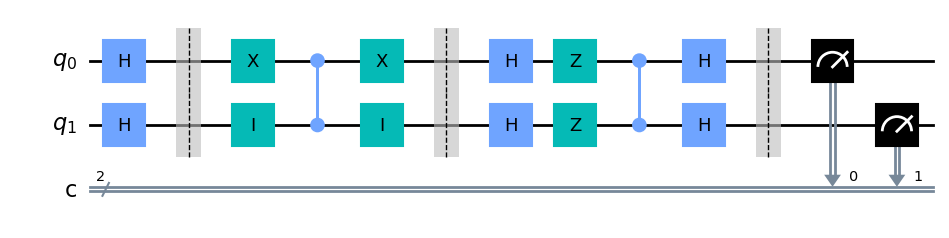

In [2]:
# ENCODING
import numpy as np
n = 2
state = ['00', '01', '10', '11']
index = np.random.randint(0,4)
print(state[index])
qc = QuantumCircuit(n,n)
qc.h(range(n))
# Phi
qc.barrier()
# Quantum Oracle (V)
if state[index] == '00':
    qc.x(0)
    qc.x(1)
    qc.cz(1,0)
    qc.x(0)
    qc.x(1)
elif state[index] == '01':
    qc.i(0)
    qc.x(1)
    qc.cz(1,0)
    qc.i(0)
    qc.x(1)
elif state[index] == '10':
    qc.x(0)
    qc.i(1)
    qc.cz(1,0)
    qc.x(0)
    qc.i(1)
elif state[index] == '11':
    qc.i(0)
    qc.i(1)
    qc.cz(1,0)
    qc.i(0)
    qc.i(1)

qc.barrier()
# Quantum Oracle W (Diffusion Operator)
qc.h(range(n))
qc.z(range(n))
qc.cz(1,0)
#qc.x(range(n))
qc.h(range(n))
qc.barrier()

qc.measure([0,1],[0,1])
qc.draw('mpl')

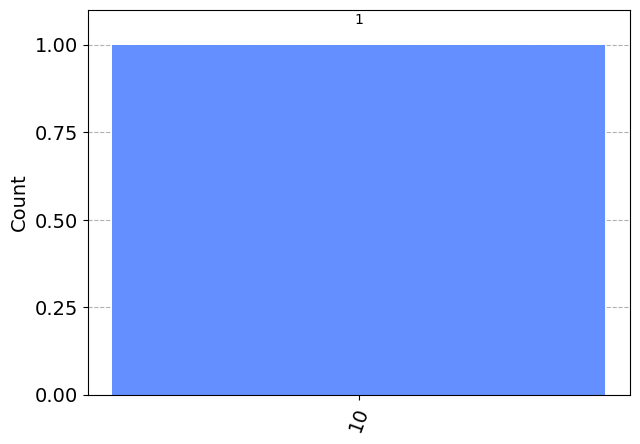

In [3]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend = backend, shots = 1)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)
#print(counts)